### Creating ANN for Regression 

In [1]:
import pandas as pd

### Reading the Dataset

In [2]:
data = pd.read_csv('Datasets/American_Housing_Data_20231209.csv')
data

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
1,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
2,10014,1650000.0,1,1,718,140 CHARLES ST APT 4D,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
3,10014,760000.0,3,2,1538,38 JONES ST,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
4,10014,1100000.0,1,1,600,81 BEDFORD ST APT 3F,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39976,98199,2495000.0,4,4,3380,2626 27TH AVE W,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
39977,98199,2295000.0,4,4,2878,3215 32ND AVE W,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
39978,98199,950000.0,3,2,1380,3257 22ND AVE W,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
39979,98199,425000.0,2,1,856,3711 26TH PL W APT 102,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223


In [3]:
data.columns

Index(['Zip Code', 'Price', 'Beds', 'Baths', 'Living Space', 'Address', 'City',
       'State', 'Zip Code Population', 'Zip Code Density', 'County',
       'Median Household Income', 'Latitude', 'Longitude'],
      dtype='object')

In [4]:
data.dtypes

Zip Code                     int64
Price                      float64
Beds                         int64
Baths                        int64
Living Space                 int64
Address                     object
City                        object
State                       object
Zip Code Population          int64
Zip Code Density           float64
County                      object
Median Household Income    float64
Latitude                   float64
Longitude                  float64
dtype: object

### Removing tUnwanted  columns

In [5]:
data.drop(['Zip Code','Address'],axis=True,inplace=True)

In [6]:
data


,Price,Beds,Baths,Living Space,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,3999000.0,2,3,1967,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
1,3999000.0,2,3,1967,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
2,1650000.0,1,1,718,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
3,760000.0,3,2,1538,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
4,1100000.0,1,1,600,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
...,...,...,...,...,...,...,...,...,...,...,...,...
39976,2495000.0,4,4,3380,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
39977,2295000.0,4,4,2878,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
39978,950000.0,3,2,1380,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
39979,425000.0,2,1,856,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223


### Checking for Duplicates Values

In [7]:
data.duplicated().sum()

1447

### Removing the Duplicates Values

In [8]:
data = data.drop_duplicates()

In [9]:
data = data.reset_index(drop=True)
data

,Price,Beds,Baths,Living Space,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,3999000.0,2,3,1967,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
1,1650000.0,1,1,718,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
2,760000.0,3,2,1538,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
3,1100000.0,1,1,600,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
4,764900.0,1,1,643,New York,New York,15514,20107.7,New York,188289.0,40.75235,-73.97260
...,...,...,...,...,...,...,...,...,...,...,...,...
38529,2495000.0,4,4,3380,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
38530,2295000.0,4,4,2878,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
38531,950000.0,3,2,1380,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
38532,425000.0,2,1,856,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223


### Checking for Null Values

In [10]:
data.isna().sum()
data.isnull().sum()

Price                      0
Beds                       0
Baths                      0
Living Space               0
City                       0
State                      0
Zip Code Population        0
Zip Code Density           0
County                     0
Median Household Income    2
Latitude                   0
Longitude                  0
dtype: int64

### Replacing the null values with mode

In [11]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
data[['Median Household Income']]= imputer.fit_transform(data[['Median Household Income']])
data.isnull().sum()

Price                      0
Beds                       0
Baths                      0
Living Space               0
City                       0
State                      0
Zip Code Population        0
Zip Code Density           0
County                     0
Median Household Income    0
Latitude                   0
Longitude                  0
dtype: int64

### Converting The categoriccal values into numerical valies

In [12]:
from sklearn.preprocessing import LabelEncoder

citys = LabelEncoder()

data['City'] = citys.fit_transform(data['City'])
data

,Price,Beds,Baths,Living Space,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,3999000.0,2,3,1967,150,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
1,1650000.0,1,1,718,150,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
2,760000.0,3,2,1538,150,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
3,1100000.0,1,1,600,150,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
4,764900.0,1,1,643,150,New York,15514,20107.7,New York,188289.0,40.75235,-73.97260
...,...,...,...,...,...,...,...,...,...,...,...,...
38529,2495000.0,4,4,3380,204,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
38530,2295000.0,4,4,2878,204,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
38531,950000.0,3,2,1380,204,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
38532,425000.0,2,1,856,204,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223


In [13]:
states = LabelEncoder()

data['State'] = states.fit_transform(data['State'])
data

,Price,Beds,Baths,Living Space,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,3999000.0,2,3,1967,150,18,29563,20967.9,New York,370046.0,40.72001,-74.00472
1,1650000.0,1,1,718,150,18,29815,23740.9,New York,249880.0,40.73407,-74.00601
2,760000.0,3,2,1538,150,18,29815,23740.9,New York,249880.0,40.73407,-74.00601
3,1100000.0,1,1,600,150,18,29815,23740.9,New York,249880.0,40.73407,-74.00601
4,764900.0,1,1,643,150,18,15514,20107.7,New York,188289.0,40.75235,-73.97260
...,...,...,...,...,...,...,...,...,...,...,...,...
38529,2495000.0,4,4,3380,204,27,22890,2086.8,King,205611.0,47.65139,-122.40223
38530,2295000.0,4,4,2878,204,27,22890,2086.8,King,205611.0,47.65139,-122.40223
38531,950000.0,3,2,1380,204,27,22890,2086.8,King,205611.0,47.65139,-122.40223
38532,425000.0,2,1,856,204,27,22890,2086.8,King,205611.0,47.65139,-122.40223


In [14]:
countys = LabelEncoder()

data['County'] = countys.fit_transform(data['County'])
data

,Price,Beds,Baths,Living Space,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,3999000.0,2,3,1967,150,18,29563,20967.9,57,370046.0,40.72001,-74.00472
1,1650000.0,1,1,718,150,18,29815,23740.9,57,249880.0,40.73407,-74.00601
2,760000.0,3,2,1538,150,18,29815,23740.9,57,249880.0,40.73407,-74.00601
3,1100000.0,1,1,600,150,18,29815,23740.9,57,249880.0,40.73407,-74.00601
4,764900.0,1,1,643,150,18,15514,20107.7,57,188289.0,40.75235,-73.97260
...,...,...,...,...,...,...,...,...,...,...,...,...
38529,2495000.0,4,4,3380,204,27,22890,2086.8,46,205611.0,47.65139,-122.40223
38530,2295000.0,4,4,2878,204,27,22890,2086.8,46,205611.0,47.65139,-122.40223
38531,950000.0,3,2,1380,204,27,22890,2086.8,46,205611.0,47.65139,-122.40223
38532,425000.0,2,1,856,204,27,22890,2086.8,46,205611.0,47.65139,-122.40223


In [15]:
data.dtypes

Price                      float64
Beds                         int64
Baths                        int64
Living Space                 int64
City                         int32
State                        int32
Zip Code Population          int64
Zip Code Density           float64
County                       int32
Median Household Income    float64
Latitude                   float64
Longitude                  float64
dtype: object

In [16]:
data.columns

Index(['Price', 'Beds', 'Baths', 'Living Space', 'City', 'State',
       'Zip Code Population', 'Zip Code Density', 'County',
       'Median Household Income', 'Latitude', 'Longitude'],
      dtype='object')

### Checking for Outliers 

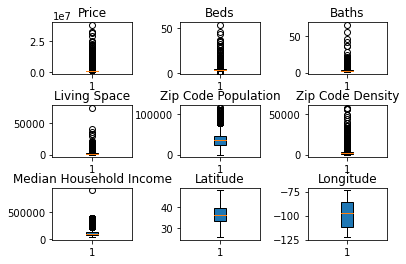

In [17]:
import matplotlib.pyplot as plt

i=1

column_names = ['Price', 'Beds', 'Baths', 'Living Space',
       'Zip Code Population', 'Zip Code Density', 
       'Median Household Income', 'Latitude', 'Longitude']

for col in column_names:
    plt.subplots_adjust(wspace=0.6,hspace=0.6)
    plt.subplot(3,3,i)
    i=i+1
    plt.boxplot(data[col],patch_artist=True)
    plt.title(col)

In [18]:
print(data.shape)

import numpy as np

(38534, 12)


### Removing the Outlier

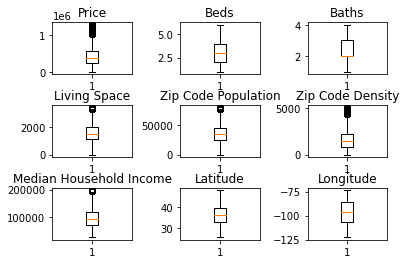

In [19]:
outlier_columns = ['Price', 'Beds', 'Baths', 'Living Space',
       'Zip Code Population', 'Zip Code Density', 
       'Median Household Income', 'Latitude', 'Longitude']

i=1

for col in outlier_columns:
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    
    IQR=Q3-Q1
    
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    upper_index=np.where(data[col] >= upper)[0]
    lower_index=np.where(data[col] <= lower)[0]
    
    data.drop(index= upper_index , inplace = True)
    data.drop(index= lower_index , inplace = True)
    
    plt.subplots_adjust(wspace=0.6,hspace=0.6)
    plt.subplot(3,3,i)
    i=i+1
    plt.boxplot(data[col])
    plt.title(col)
    
    data.reset_index(inplace=True)
    data.drop('index',axis=1,inplace=True)
    #data.reset_index(drop=True, inplace=True)
    

In [20]:
print(data.shape)

(29369, 12)


In [21]:
correlation=data.corr()
correlation

,Price,Beds,Baths,Living Space,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
Price,1.000000,0.204750,0.408255,0.428086,0.107577,-0.173927,0.039564,0.172135,-0.023091,0.549075,-0.072191,-0.325984
Beds,0.204750,1.000000,0.512336,0.658574,-0.034248,0.097574,0.104973,-0.196477,0.015431,-0.019792,-0.034393,0.060117
Baths,0.408255,0.512336,1.000000,0.703188,-0.033678,0.086594,0.091919,-0.176726,-0.037871,0.236912,-0.113255,0.045877
Living Space,0.428086,0.658574,0.703188,1.000000,-0.028734,0.103812,0.032549,-0.243263,-0.017375,0.216778,-0.072986,0.022542
City,0.107577,-0.034248,-0.033678,-0.028734,1.000000,-0.093696,-0.035917,0.027670,0.310814,0.099328,0.082577,-0.167196
State,-0.173927,0.097574,0.086594,0.103812,-0.093696,1.000000,0.071974,-0.127834,0.091043,-0.051450,0.035083,0.324896
Zip Code Population,0.039564,0.104973,0.091919,0.032549,-0.035917,0.071974,1.000000,0.063119,-0.046276,-0.019373,-0.117287,-0.006189
Zip Code Density,0.172135,-0.196477,-0.176726,-0.243263,0.027670,-0.127834,0.063119,1.000000,-0.063096,0.009901,0.235512,-0.091194
County,-0.023091,0.015431,-0.037871,-0.017375,0.310814,0.091043,-0.046276,-0.063096,1.000000,0.003129,0.001189,0.086756
Median Household Income,0.549075,-0.019792,0.236912,0.216778,0.099328,-0.051450,-0.019373,0.009901,0.003129,1.000000,0.037722,-0.200673


In [22]:

data.columns
data.drop(['Zip Code Population', 'County','Latitude'],axis=1,inplace=True)

In [24]:
x=data.drop('Price', axis = 1)

In [25]:
y=data['Price']

In [26]:
x

,Beds,Baths,Living Space,City,State,Zip Code Density,Median Household Income,Longitude
0,6,2,1920,213,18,3980.1,118113.0,-74.09564
1,4,2,1853,213,18,3980.1,118113.0,-74.09564
2,4,3,1980,213,18,3980.1,118113.0,-74.09564
3,3,1,2288,213,18,3980.1,118113.0,-74.09564
4,4,2,2511,213,18,3980.1,118113.0,-74.09564
...,...,...,...,...,...,...,...,...
29364,3,2,2880,204,27,2070.4,133779.0,-122.24735
29365,3,1,1230,204,27,2070.4,133779.0,-122.24735
29366,2,2,1010,204,27,2070.4,133779.0,-122.24735
29367,4,3,2274,204,27,2070.4,133779.0,-122.24735


In [27]:
y

0         950000.0
1         750000.0
2        1148888.0
3         998000.0
4         849000.0
           ...    
29364     750000.0
29365     485000.0
29366     625000.0
29367     899900.0
29368     388000.0
Name: Price, Length: 29369, dtype: float64

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=120)

In [32]:

import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam , SGD,Adagrad


### Creating a model with ANN for Price prediction

In [33]:
model  = Sequential()

model.add(Dense(50,input_dim = 8,activation= 'relu',kernel_initializer='uniform'))

model.add(Dense(100,activation ='relu',kernel_initializer='uniform'))
model.add(Dense(100,activation= 'relu',kernel_initializer='uniform'))
model.add(Dense(75,activation ='relu'))
model.add(Dense(100,activation ='relu'))
model.add(Dense(100,activation ='relu'))


model.add(Dense(1,activation= 'relu'))

callbacks = tf.keras.callbacks.EarlyStopping(monitor = 'loss',patience = 50)

model.compile(loss= 'mse',optimizer = Adam(learning_rate =0.001))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 50)                450       
                                                                 
 dense_8 (Dense)             (None, 100)               5100      
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 dense_10 (Dense)            (None, 75)                7575      
                                                                 
 dense_11 (Dense)            (None, 100)               7600      
                                                                 
 dense_12 (Dense)            (None, 100)               10100     
                                                                 
 dense_13 (Dense)            (None, 1)                

### Training  the model

In [34]:
training_info = model.fit(x_train,y_train,batch_size=200,epochs=100,validation_data=(x_test,y_test),callbacks=callbacks)

Epoch 1/100
118/118 [==============================] - 1s 3ms/step - loss: 78688206848.0000 - val_loss: 37322731520.0000
Epoch 2/100
118/118 [==============================] - 0s 2ms/step - loss: 36794056704.0000 - val_loss: 36751974400.0000
Epoch 3/100
118/118 [==============================] - 0s 2ms/step - loss: 36216434688.0000 - val_loss: 36047060992.0000
Epoch 4/100
118/118 [==============================] - 0s 2ms/step - loss: 35407556608.0000 - val_loss: 35695050752.0000
Epoch 5/100
118/118 [==============================] - 0s 2ms/step - loss: 34475229184.0000 - val_loss: 33685544960.0000
Epoch 6/100
118/118 [==============================] - 0s 2ms/step - loss: 33313234944.0000 - val_loss: 32652130304.0000
Epoch 7/100
118/118 [==============================] - 0s 2ms/step - loss: 33059751936.0000 - val_loss: 33302802432.0000
Epoch 8/100
118/118 [==============================] - 0s 2ms/step - loss: 32662953984.0000 - val_loss: 32368881664.0000
Epoch 9/100
118/118 [===========

In [35]:
hist = training_info.history

### Training Loss vs Testing Loss

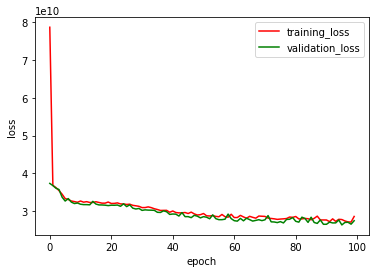

In [36]:
plt.plot(hist['loss'],label='training_loss',color='red')
plt.plot(hist['val_loss'],label='validation_loss',color='green')
plt.xlabel('epoch')
plt.ylabel("loss")
plt.legend()

### Model Prediction

In [37]:
y_pred = model.predict(x_test)

184/184 [==============================] - 0s 633us/step


In [38]:
y_pred = ((y_pred[:,0]))

In [39]:
pd.DataFrame({'True Value' : y_test ,'Predicted Value' : y_pred })

,True Value,Predicted Value
1573,597500.0,548962.18750
36,499999.0,524079.21875
27323,675000.0,684049.62500
1694,297715.0,341190.56250
17676,439000.0,370956.62500
...,...,...
6854,260000.0,350294.46875
16146,369900.0,553450.18750
15489,675000.0,571748.62500
5090,697900.0,244530.87500


In [40]:
from sklearn.metrics import r2_score

In [41]:
r2_score(y_test,y_pred )

0.4911814893435835